In [28]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('R01_posneg_gest_stats_fdr05.csv')
df = df.fillna(0)
df = df.drop('Unnamed: 0', axis=1)
df = df.set_index('iso_id_esi')
df.head()

,chem_id_s1,M331,M332,M317,M524,M102,M341,M330,M345,M340,...,BH_sig_gestC,sig_gestcatC_neg,sig_gestcatC_pos,BH_sig_gestcatC,sig_gestcatV2C_neg,sig_gestcatV2C_pos,BH_sig_gestcatV2C,sig_gestMC_neg,sig_gestMC_pos,BH_sig_gestMC
iso_id_esi,,,,,,,,,,,,,,,,,,,,,
C10H10N2_1.0_pos,158.0848_1.8326_75,23014.583414,35781.743242,630102.449070,11495.685179,297645.722596,114589.220618,1.526543e+06,101597.021085,236089.213100,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
C10H12O_1.0_pos,148.0886_3.6386_30,10460.647408,22674.974161,22478.453200,10830.129767,46811.341571,27959.377011,1.155142e+04,5633.801102,26549.384877,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
C10H12O4_1.0_pos,196.0739_11.7317_477,11323.048129,11816.145003,11821.121662,12678.024245,6034.328408,18383.357132,1.089179e+04,10890.162708,10792.346778,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
C10H13N_1.0_pos,147.1045_3.2268_364,57081.423799,54767.399215,49932.178513,38288.600153,3325.918526,72691.996597,4.950163e+04,79429.757331,7759.361744,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
C10H13N_2.0_pos,147.1047_7.2359_363,5268.617733,3069.552750,11034.774489,4001.319531,3115.572284,3158.377996,1.068680e+03,1742.412358,3674.003545,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0


In [30]:
df = df[(df['Sodium_Adduct'] == 0) & (df['Adduct_filter']== 0)]
df = df[(df['Potasium_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['Ammonium_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['ACN_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['Formate_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['H2O_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['CO2_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[df['pos_neg_dup'] == 0]

In [31]:
df.shape

(685, 647)

In [32]:
#df.to_csv('R01_posneg_database_search_clean.csv')

In [33]:
dfEndo = df[df['Met_Presence'] == 1]
dfExo  = df[df['Met_Presence'] == 0]

In [34]:
#dfEndo.to_csv('R01_posneg_Endo.csv')
#dfExo.to_csv('R01_posneg_Exo.csv')

In [35]:
df['species1'] = np.where(df['Met_Presence'] == 1, 'endogenous', 'exogenous')
lut1 = dict(zip(df['species1'].unique(), ["darkgray","red"]))
row_colors = df['species1'].map(lut1)

In [36]:
df1 = df.loc[:, 'M331':'845C']
df1M = df1.loc[:, df1.columns.str.contains('M')]
df1C = df1.loc[:, df1.columns.str.contains('C')]
df1M

,M331,M332,M317,M524,M102,M341,M330,M345,M340,M507,...,243M,255M,253M,264M,838M,849M,839M,842M,846M,845M
iso_id_esi,,,,,,,,,,,,,,,,,,,,,
C10H10N2_1.0_pos,23014.583414,35781.743242,630102.449070,11495.685179,297645.722596,114589.220618,1.526543e+06,101597.021085,236089.213100,81900.609782,...,54584.726859,83452.409133,1612.443575,8474.103313,86053.975315,507207.099776,539755.317521,1.513144e+06,12566.665110,173727.503672
C10H12O_1.0_pos,10460.647408,22674.974161,22478.453200,10830.129767,46811.341571,27959.377011,1.155142e+04,5633.801102,26549.384877,44374.630789,...,119211.017666,22817.515395,4013.652584,57049.791589,113006.655029,80248.024116,13175.681252,6.866381e+04,34161.361045,7525.636328
C10H12O4_1.0_pos,11323.048129,11816.145003,11821.121662,12678.024245,6034.328408,18383.357132,1.089179e+04,10890.162708,10792.346778,11867.819089,...,60576.027062,28810.768673,22327.122224,29916.386218,49233.318128,22817.217347,13930.740668,6.510839e+04,43484.773326,51545.006679
C10H13N_1.0_pos,57081.423799,54767.399215,49932.178513,38288.600153,3325.918526,72691.996597,4.950163e+04,79429.757331,7759.361744,9751.503718,...,68400.199053,50001.187169,4356.834172,28669.862128,43025.175918,11363.719365,30439.036411,5.527116e+04,16877.581096,89172.485902
C10H13N_2.0_pos,5268.617733,3069.552750,11034.774489,4001.319531,3115.572284,3158.377996,1.068680e+03,1742.412358,3674.003545,5149.132762,...,3693.271603,7975.282620,788.697534,7134.246577,11256.895913,3045.246890,2435.619178,9.048659e+03,6700.440112,2850.469068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C9H8N2O_1.0_neg,7539.435471,104818.089726,4011.933121,13480.667976,113395.643158,60719.560627,5.238938e+03,45589.479347,117230.137490,9039.353423,...,28314.162542,44483.619427,121839.802257,396855.580300,192146.835564,8653.475487,1882.350222,8.426725e+03,6447.592566,7389.666183
C9H8O_1.0_neg,635.582616,1768.427586,1406.367253,7809.952567,13035.288043,1433.358954,1.827622e+03,1669.775180,4544.108838,6990.801920,...,65713.265139,6732.725498,2518.397530,2940.506264,15959.789439,3148.281978,3695.144942,1.131549e+04,7515.873727,9716.447099
C9H8O2_1.0_neg,358159.014834,157068.385277,701612.501761,372464.792116,244608.739591,384360.588364,2.211682e+05,376849.914047,447320.709265,954168.080257,...,11096.267976,386662.962620,273508.405272,461943.201158,268569.046699,381187.454918,246771.685005,6.058861e+05,442655.315490,266843.937109


In [40]:
df1M = np.log10(df1M)
df1Mt = df1M.T
df1Mt_cm = df1Mt.corr()

In [41]:
df1C = np.log10(df1C)
df1Ct = df1C.T
df1Ct_cm = df1Ct.corr()

In [54]:
df1Mt_cm.to_csv('m_matrix_r_values.csv')
df1Ct_cm.to_csv('c_matrix_r_values.csv')

In [42]:
# Create a correlation matrix with p-values 
from scipy.stats import pearsonr

def calculate_pvalues(df1t):
    df1tcols = pd.DataFrame(columns=df1t.columns)
    pvalues = df1tcols.transpose().join(df1tcols, how='outer')
    for r in df1t.columns:
        for c in df1t.columns:
            pvalues[r][c] = round(pearsonr(df1t[r], df1t[c])[1], 5)
    return pvalues

In [43]:
df1C_pm = calculate_pvalues(df1Ct)
df1C_pm

,C10H10N2_1.0_pos,C10H12O_1.0_pos,C10H12O4_1.0_pos,C10H13N_1.0_pos,C10H13N_2.0_pos,C10H14O_1.0_pos,C10H14O2_1.0_pos,C10H14O3_1.0_pos,C10H15NO2_1.0_pos,C10H16O_2.0_pos,...,C9H18O2_1.0_neg,C9H18O2_2.0_neg,C9H18O2_3.0_neg,C9H18O3_1.0_neg,C9H7NO2_1.0_neg,C9H8N2O_1.0_neg,C9H8O_1.0_neg,C9H8O2_1.0_neg,C9H8O3_1.0_neg,C9HF17O2_1.0_neg
iso_id_esi,,,,,,,,,,,,,,,,,,,,,
C10H10N2_1.0_pos,0,0.43502,0,0.00652,0.96765,0.034,0.00064,0.00873,0,0.05193,...,0.2182,0.12739,0.07739,0.25839,0.07353,0.86396,0.2489,0.04729,0.31886,0.39828
C10H12O_1.0_pos,0.43502,0,0.00758,0,0.7785,0.85949,2e-05,0.0481,0.1212,0.43252,...,8e-05,0.07047,0.00122,0.08072,0.03208,0.15819,0.06707,0.03682,0.19595,0.03966
C10H12O4_1.0_pos,0,0.00758,0,0,0.98907,0.04963,0.0545,4e-05,0.00042,0.01231,...,0.06383,0.00104,0.00012,0.4785,0.00541,0.01603,0.01163,0.00129,0.11877,0.02695
C10H13N_1.0_pos,0.00652,0,0,0,0.43873,0.03123,0.0003,0.00062,0,0.01074,...,0.94647,0.00169,0.10244,0.00912,0.16478,0.03547,0.06074,0.00506,0.54564,0.69312
C10H13N_2.0_pos,0.96765,0.7785,0.98907,0.43873,0,0.2932,0.48698,0.2298,0.73086,0.97349,...,0.9408,0.27604,0.88478,0.83189,0.28239,0.09488,0.35346,0.79808,0.00525,0.30099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C9H8N2O_1.0_neg,0.86396,0.15819,0.01603,0.03547,0.09488,0.02942,0.06304,0.72275,0.00144,0.20239,...,0.11243,4e-05,0.33135,0.17306,0.00593,0,0.3918,0.71298,0.36634,0.72886
C9H8O_1.0_neg,0.2489,0.06707,0.01163,0.06074,0.35346,0.00808,0.35683,0.22738,0.48996,0.58387,...,0.40313,0.41829,0.41079,0.119,0.05179,0.3918,0,0.03228,0.02184,0.79596
C9H8O2_1.0_neg,0.04729,0.03682,0.00129,0.00506,0.79808,0.9819,0.12985,0.49683,0.26191,0.00057,...,0.02458,0.41452,0.00262,0.18724,0.04372,0.71298,0.03228,0,0.47401,0.13283


In [44]:
df1M_pm = calculate_pvalues(df1Mt)
df1M_pm

,C10H10N2_1.0_pos,C10H12O_1.0_pos,C10H12O4_1.0_pos,C10H13N_1.0_pos,C10H13N_2.0_pos,C10H14O_1.0_pos,C10H14O2_1.0_pos,C10H14O3_1.0_pos,C10H15NO2_1.0_pos,C10H16O_2.0_pos,...,C9H18O2_1.0_neg,C9H18O2_2.0_neg,C9H18O2_3.0_neg,C9H18O3_1.0_neg,C9H7NO2_1.0_neg,C9H8N2O_1.0_neg,C9H8O_1.0_neg,C9H8O2_1.0_neg,C9H8O3_1.0_neg,C9HF17O2_1.0_neg
iso_id_esi,,,,,,,,,,,,,,,,,,,,,
C10H10N2_1.0_pos,0,0.06281,0,0.00426,0.44698,0.14538,0.26546,0.00028,0.0002,0,...,0.0305,0.00096,0.7967,0.61756,0.32067,0.15846,0.06861,0.04766,0.80535,0.70124
C10H12O_1.0_pos,0.06281,0,0.00014,0.00021,0.21376,0.00442,0,0.01032,0,0.0015,...,0.00581,0.68607,0.21197,0.00964,0.06078,0.50804,0.95731,0.0275,0.44994,0.0364
C10H12O4_1.0_pos,0,0.00014,0,0,0.64347,0,0.03677,0,0,0,...,1e-05,0,0.86879,0.21646,0.40669,0.02902,0.27212,0.03461,0.69565,0.0091
C10H13N_1.0_pos,0.00426,0.00021,0,0,0.45558,0.0007,0.0026,2e-05,4e-05,0,...,0.45183,1e-05,0.5924,0.14654,0.79042,6e-05,0.22526,0.00226,0.40505,0.14095
C10H13N_2.0_pos,0.44698,0.21376,0.64347,0.45558,0,0.29418,0.55879,0.20572,0.80068,0.05575,...,0.22476,0.90499,0.44723,0.69507,6e-05,0.84163,0.01761,0.03757,0.47928,0.02633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C9H8N2O_1.0_neg,0.15846,0.50804,0.02902,6e-05,0.84163,0.51963,0.17614,0.06265,0.03893,0.0168,...,0.34827,0.00325,0.99831,0.42509,0.00139,0,0.62609,0.9977,0.1032,0.6162
C9H8O_1.0_neg,0.06861,0.95731,0.27212,0.22526,0.01761,0.01275,0.81049,0.319,0.346,0.00148,...,0.01325,0.62204,0.27864,0.8739,0.018,0.62609,0,0.07706,0.01817,0.43786
C9H8O2_1.0_neg,0.04766,0.0275,0.03461,0.00226,0.03757,0.65639,0.56417,0.00212,0.00755,0.00321,...,0,0.86513,0.03456,4e-05,0.00012,0.9977,0.07706,0,0.24996,0.01267


In [55]:
df1M_pm.to_csv('m_matrix_p_values.csv')
df1C_pm.to_csv('c_matrix_p_values.csv')

sns.set(font_scale=1)
g = sns.clustermap(df1t_cm, cmap='YlGnBu_r', row_colors=row_colors, col_colors=row_colors)

In [45]:
df1M = pd.concat([df1Mt_cm, row_colors], axis=1)
#df1 = df1.sort_values(by='species1')
df1M = df1M.loc[df1M['species1'] == 'red']
df1M = df1M.drop('species1', axis=1)

In [46]:
df1C = pd.concat([df1Ct_cm, row_colors], axis=1)
#df1 = df1.sort_values(by='species1')
df1C = df1C.loc[df1C['species1'] == 'red']
df1C = df1C.drop('species1', axis=1)

In [47]:
df1M = df1M.T
df1M = pd.concat([df1M, row_colors], axis=1)
df1M = df1M.loc[df1M['species1'] == 'darkgray']
df1M = df1M.drop('species1', axis=1)
df1M = df1M.T

In [48]:
df1C = df1C.T
df1C = pd.concat([df1C, row_colors], axis=1)
df1C = df1C.loc[df1C['species1'] == 'darkgray']
df1C = df1C.drop('species1', axis=1)
df1C = df1C.T

In [51]:
df1M.head()

iso_id_esi,C10H10N2_1.0_pos,C10H12O_1.0_pos,C10H13N_1.0_pos,C10H13N_2.0_pos,C10H14O_1.0_pos,C10H14O2_1.0_pos,C10H14O3_1.0_pos,C10H15NO2_1.0_pos,C10H16O_2.0_pos,C10H16O2_1.0_pos,...,C9H17NO_2.0_neg,C9H17NO2_1.0_neg,C9H17NO3_1.0_neg,C9H17NO3_2.0_neg,C9H17NO3_3.0_neg,C9H18O3_1.0_neg,C9H7NO2_1.0_neg,C9H8N2O_1.0_neg,C9H8O_1.0_neg,C9HF17O2_1.0_neg
C10H12O4_1.0_pos,0.318641,0.219929,0.408445,0.027104,0.281304,0.121858,0.314578,0.331482,0.323853,0.192612,...,0.134251,-0.252635,-0.128339,0.028603,-0.207090,-0.072298,-0.048569,0.127352,-0.064256,-0.151881
C11H11NO2_2.0_pos,-0.121772,0.070754,-0.018749,0.028606,0.082567,0.009224,-0.049022,0.053520,-0.057690,0.017686,...,0.058918,0.030994,-0.055124,-0.033407,0.051617,-0.070149,0.085319,0.085925,0.061882,-0.029037
C14H18O4_1.0_pos,0.382639,0.162108,0.218792,-0.022469,0.007520,0.170313,0.117143,0.348650,0.173998,0.064484,...,0.122492,-0.058198,-0.217183,0.147844,-0.101799,0.074548,0.018119,0.071971,-0.098298,0.124809
C14H26O2_1.0_pos,0.053493,-0.096637,-0.088638,0.090569,-0.050448,-0.124478,-0.020851,0.027240,0.057627,-0.104647,...,0.086124,-0.180271,-0.113015,-0.130664,-0.108170,-0.167710,-0.014407,-0.040802,0.041594,-0.128009
C15H26O_1.0_pos,-0.015216,0.227832,0.030720,0.109218,-0.015837,0.224076,-0.037418,0.163957,-0.018151,-0.141535,...,0.143968,0.127694,-0.050031,0.090366,0.276610,0.133080,0.063892,0.003636,0.056640,0.093060


In [52]:
df1C.head()

iso_id_esi,C10H10N2_1.0_pos,C10H12O_1.0_pos,C10H13N_1.0_pos,C10H13N_2.0_pos,C10H14O_1.0_pos,C10H14O2_1.0_pos,C10H14O3_1.0_pos,C10H15NO2_1.0_pos,C10H16O_2.0_pos,C10H16O2_1.0_pos,...,C9H17NO_2.0_neg,C9H17NO2_1.0_neg,C9H17NO3_1.0_neg,C9H17NO3_2.0_neg,C9H17NO3_3.0_neg,C9H18O3_1.0_neg,C9H7NO2_1.0_neg,C9H8N2O_1.0_neg,C9H8O_1.0_neg,C9HF17O2_1.0_neg
C10H12O4_1.0_pos,0.285260,0.155444,0.451547,-0.000803,0.114604,0.112267,0.238639,0.204485,0.145831,0.067958,...,-0.061236,-0.018766,0.021197,0.155402,-0.155857,-0.041492,-0.161836,0.140350,-0.146989,-0.129034
C11H11NO2_2.0_pos,0.007058,0.161970,-0.096400,0.074678,0.057132,0.114076,0.053688,-0.049516,0.090558,0.036869,...,0.057006,0.015492,0.038126,0.001103,0.062854,0.051796,0.042642,0.230659,-0.000071,0.006741
C14H18O4_1.0_pos,0.338088,0.025947,0.240103,-0.045067,-0.006310,0.123241,0.043024,0.514227,0.127322,-0.034555,...,0.025889,-0.018391,-0.090795,0.129138,-0.120122,0.143152,0.038513,0.097342,-0.165467,0.095311
C14H26O2_1.0_pos,0.190236,0.056862,0.086103,0.132750,0.068882,0.145959,0.026721,0.140585,0.093930,0.081053,...,0.109306,-0.028193,-0.068895,0.108641,-0.032444,0.149789,0.056884,0.080063,0.002076,0.105912
C15H26O_1.0_pos,0.014851,0.240597,0.039713,0.045953,0.072741,0.135233,0.084753,0.036180,-0.087519,-0.015070,...,0.170559,0.220637,0.054777,0.170809,0.316879,0.046701,0.026861,0.041364,0.165596,0.146451


In [24]:
subset_dfM = df1M[(df1M > 0.5)|(df1M < -0.5)]
column_count = subset_dfM.count()
column_count.sum()

103

In [25]:
subset_dfM = df1M[(df1M < -0.5)]
column_count = subset_dfM.count()
column_count.sum()

6

In [26]:
subset_dfC = df1C[(df1C > 0.5)|(df1C < -0.5)]
column_count = subset_dfC.count()
column_count.sum()

128

In [27]:
subset_dfC = df1C[(df1C < -0.5)]
column_count = subset_dfC.count()
column_count.sum()

1

In [95]:
#df1.to_csv('endogenous_vs_exogenous_matrix.csv')

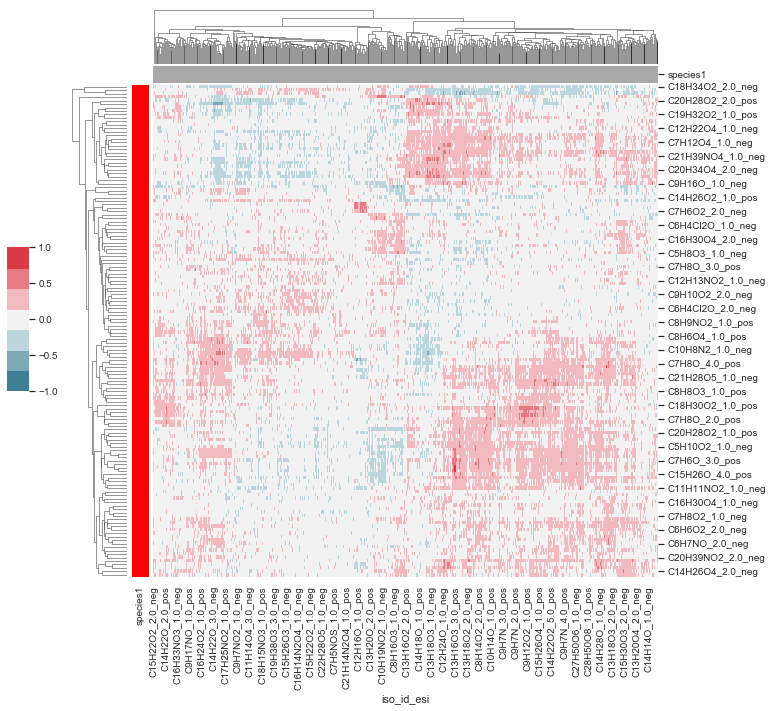

In [97]:
sns.set(font_scale=0.9)
g = sns.clustermap(df1M, cmap=sns.diverging_palette(220, 10, sep=20, n=7), 
                   row_colors=row_colors, col_colors=row_colors, vmin=-1, vmax=1,
                   dendrogram_ratio=0.1, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('endoMatrixM.tiff', dpi=300)

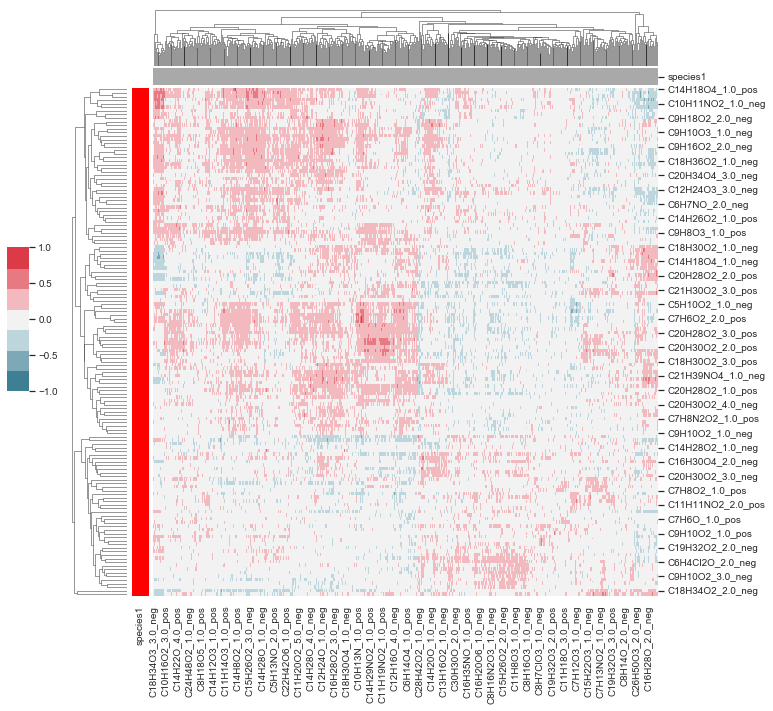

In [98]:
sns.set(font_scale=0.9)
g = sns.clustermap(df1C, cmap=sns.diverging_palette(220, 10, sep=20, n=7), 
                   row_colors=row_colors, col_colors=row_colors, vmin=-1, vmax=1,
                   dendrogram_ratio=0.1, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('endoMatrixC.tiff', dpi=300)

In [185]:
df1 = pd.concat([df1M_pm, row_colors], axis=1)
#df1 = df1.sort_values(by='species1')
df1 = df1.loc[df1['species1'] == 'red']
df1 = df1.drop('species1', axis=1)

In [186]:
df1 = df1.T
df1 = pd.concat([df1, row_colors], axis=1)
df1 = df1.loc[df1['species1'] == 'darkgray']
df1 = df1.drop('species1', axis=1)
df1 = df1.T

In [187]:
df1

iso_id_esi,C10H10N2_1.0_pos,C10H12O_1.0_pos,C10H13N_1.0_pos,C10H13N_2.0_pos,C10H14O_1.0_pos,C10H14O2_1.0_pos,C10H14O3_1.0_pos,C10H15NO2_1.0_pos,C10H16O_2.0_pos,C10H16O2_1.0_pos,...,C9H17NO_2.0_neg,C9H17NO2_1.0_neg,C9H17NO3_1.0_neg,C9H17NO3_2.0_neg,C9H17NO3_3.0_neg,C9H18O3_1.0_neg,C9H7NO2_1.0_neg,C9H8N2O_1.0_neg,C9H8O_1.0_neg,C9HF17O2_1.0_neg
C10H12O4_1.0_pos,0,4e-05,0,0.81477,0,0.02611,0,0,0,0.00027,...,0.02197,0,0.03491,0.53294,0.00018,0.2504,0.37976,0.0243,0.26769,0.00714
C11H11NO2_2.0_pos,0.0478,0.29987,0.83381,0.79865,0.13252,0.85256,0.32354,0.43035,0.25772,0.68609,...,0.28463,0.52967,0.33675,0.76198,0.51508,0.32369,0.13418,0.07989,0.26676,0.71336
C14H18O4_1.0_pos,0,0.00302,0.00025,0.52171,0.94817,0.00196,0.03157,0,0.00159,0.30995,...,0.03626,0.16746,0.00015,0.00737,0.07649,0.16811,0.70308,0.25054,0.05548,0.03717
C14H26O2_1.0_pos,0.31496,0.07014,0.11997,0.13371,0.44085,0.02304,0.56662,0.61074,0.30691,0.07055,...,0.10596,0.00057,0.04781,0.02249,0.05628,0.00203,0.80901,0.53848,0.48921,0.01339
C15H26O_1.0_pos,0.76429,6e-05,0.53144,0.06836,0.7846,7e-05,0.47005,0.00479,0.75804,0.00974,...,0.01173,0.01555,0.33973,0.04611,0,0.01066,0.31123,0.85171,0.32793,0.09029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C9H18O2_1.0_neg,0.03177,0.00265,0.50789,0.21843,0.01394,0.02922,0.5669,0.72059,0.10518,0.00142,...,0.39214,0,0.00015,0,0,0,0.01373,0.41492,0.03285,0
C9H18O2_2.0_neg,0.0014,0.66615,1e-05,0.86905,0.62031,0.26617,0.2927,0.1052,0.00034,0.85242,...,0.83239,0.45264,0.11019,0.7438,0.25487,0.84916,0.01542,0.0029,0.54979,0.04692
C9H18O2_3.0_neg,0.73535,0.16588,0.47042,0.43293,0.71214,0.02002,0.08606,0.00898,0.32231,0.42769,...,0.06967,0.00823,0.10238,0,0.86709,0,0.01482,0.92004,0.30609,0.00021
C9H8O2_1.0_neg,0.04858,0.01932,0.001,0.04042,0.68126,0.6801,0.00024,0.01591,0.00053,0.47793,...,0.08381,4e-05,0.00527,0.04657,0.12942,2e-05,3e-05,0.8989,0.03002,0.0056


In [188]:
subset_df = df1[df1 < 0.05]
column_count = subset_df.count()

In [189]:
column_count.sum()

29501

In [190]:
df1.stack()

                  iso_id_esi      
C10H12O4_1.0_pos  C10H10N2_1.0_pos          0
                  C10H12O_1.0_pos       4e-05
                  C10H13N_1.0_pos           0
                  C10H13N_2.0_pos     0.81477
                  C10H14O_1.0_pos           0
                                       ...   
C9H8O3_1.0_neg    C9H18O3_1.0_neg     0.63793
                  C9H7NO2_1.0_neg     0.00545
                  C9H8N2O_1.0_neg     0.12825
                  C9H8O_1.0_neg       0.03242
                  C9HF17O2_1.0_neg    0.65656
Length: 77106, dtype: object

In [191]:
df1s = df1.stack()

In [192]:
df1s = df1s.reset_index()

In [193]:
df1s.columns = ['level1', 'iso_id_esi', 'pvalue']

In [194]:
dft = df1s

In [195]:
#Benjamini-Hochberg filtering p-values
dft = dft.sort_values(by='pvalue')
dft['rank'] = dft.reset_index().index + 1
dft['(I/m)Q'] = (dft['rank']/len(dft))*0.05
dft['(I/m)Q - p'] = dft['(I/m)Q'] - dft['pvalue']
dft['BH_sig'] = np.where(dft['(I/m)Q - p'] < 0, '0', '1')

In [196]:
dft = dft[dft['BH_sig'] == '1']

In [197]:
dft

,level1,iso_id_esi,pvalue,rank,(I/m)Q,(I/m)Q - p,BH_sig
0,C10H12O4_1.0_pos,C10H10N2_1.0_pos,0,1,6.484580e-07,6.48458e-07,1
28199,C10H12O4_1.0_neg,C7H14O2_1.0_neg,0,2,1.296916e-06,1.29692e-06,1
28201,C10H12O4_1.0_neg,C7H14O3_1.0_neg,0,3,1.945374e-06,1.94537e-06,1
28222,C10H12O4_1.0_neg,C8HF17O3S_1.0_neg,0,4,2.593832e-06,2.59383e-06,1
28321,C10H20O2_1.0_neg,C14H20O2_1.0_pos,0,5,3.242290e-06,3.24229e-06,1
...,...,...,...,...,...,...,...
9242,C20H28O2_3.0_pos,C10H16O2_4.0_pos,0.01395,21518,1.395352e-02,3.51853e-06,1
2524,C15H26O_1.0_pos,C15H22O2_1.0_neg,0.01395,21519,1.395417e-02,4.16699e-06,1
33803,C12H24O3_3.0_neg,C19H32O3_3.0_pos,0.01395,21520,1.395482e-02,4.81545e-06,1
39374,C16H30O4_2.0_neg,C11H8O3_1.0_neg,0.01395,21521,1.395546e-02,5.46391e-06,1


In [112]:
# Annotations for endogenous and exogenous compounds
df

,chem_id_s1,M331,M332,M317,M524,M102,M341,M330,M345,M340,...,sig_gestcatC_neg,sig_gestcatC_pos,BH_sig_gestcatC,sig_gestcatV2C_neg,sig_gestcatV2C_pos,BH_sig_gestcatV2C,sig_gestMC_neg,sig_gestMC_pos,BH_sig_gestMC,species1
iso_id_esi,,,,,,,,,,,,,,,,,,,,,
C10H10N2_1.0_pos,158.0848_1.8326_75,23014.583414,35781.743242,630102.449070,11495.685179,297645.722596,114589.220618,1.526543e+06,101597.021085,236089.213100,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
C10H12O_1.0_pos,148.0886_3.6386_30,10460.647408,22674.974161,22478.453200,10830.129767,46811.341571,27959.377011,1.155142e+04,5633.801102,26549.384877,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
C10H12O4_1.0_pos,196.0739_11.7317_477,11323.048129,11816.145003,11821.121662,12678.024245,6034.328408,18383.357132,1.089179e+04,10890.162708,10792.346778,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,endogenous
C10H13N_1.0_pos,147.1045_3.2268_364,57081.423799,54767.399215,49932.178513,38288.600153,3325.918526,72691.996597,4.950163e+04,79429.757331,7759.361744,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
C10H13N_2.0_pos,147.1047_7.2359_363,5268.617733,3069.552750,11034.774489,4001.319531,3115.572284,3158.377996,1.068680e+03,1742.412358,3674.003545,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C9H8N2O_1.0_neg,160.0639_5.7146_33,7539.435471,104818.089726,4011.933121,13480.667976,113395.643158,60719.560627,5.238938e+03,45589.479347,117230.137490,...,1.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
C9H8O_1.0_neg,132.0576_5.3568_283,635.582616,1768.427586,1406.367253,7809.952567,13035.288043,1433.358954,1.827622e+03,1669.775180,4544.108838,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
C9H8O2_1.0_neg,148.0526_2.1169_256,358159.014834,157068.385277,701612.501761,372464.792116,244608.739591,384360.588364,2.211682e+05,376849.914047,447320.709265,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,endogenous


In [113]:
df1 = df.loc[:, 'M331':'845C']
df1 = np.log10(df1)

In [114]:
df1['species1'] = df['species1']

In [115]:
df1 = df1.reset_index()

In [116]:
df1['Formula'] = df1['iso_id_esi'].str.split('_').apply(lambda x: x[0])

In [117]:
df1endo = df1[df1['species1'] == 'endogenous']
df1exo = df1[df1['species1'] == 'exogenous']

In [118]:
IsoEndo = pd.read_csv('R01_isomer_rank_endo.csv')
IsoExo = pd.read_csv('R01_isomer_rank_exo.csv')

In [119]:
IsoEndo = IsoEndo[IsoEndo['SCORE'] > 0.3]
IsoExo = IsoExo[IsoExo['SCORE'] > 0.3]

In [120]:
IsoExo.shape

(37, 12)

In [121]:
IsoEndo = IsoEndo.loc[:, 'Formula':'PREFERRED_NAME']
IsoExo = IsoExo.loc[:, 'Formula':'PREFERRED_NAME']

In [122]:
df1endo = pd.merge(df1endo, IsoEndo, on='Formula')
df1exo = pd.merge(df1exo, IsoExo, on='Formula')

In [123]:
df1 = pd.concat([df1endo, df1exo], axis=0)

In [124]:
df11 = df1.loc[:, 'M331':'845C']
df12= df1.loc[:, 'species1':'PREFERRED_NAME']

df1M = df11.loc[:, df11.columns.str.contains('M')]
df1C = df11.loc[:, df11.columns.str.contains('C')]

In [125]:
df1M['ChemicalName'] = df1['PREFERRED_NAME']
df1C['ChemicalName'] = df1['PREFERRED_NAME']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
df1M = df1M.set_index('ChemicalName')
df1C = df1C.set_index('ChemicalName')

In [127]:
df1M.to_csv('maternal_features_annotations.csv')
df1C.to_csv('cord_features_annotations.csv')

In [128]:
df1MT = df1M.T
df1MT.columns.name = None

In [129]:
df1Mcm = df1MT.corr()
df1Mcm = df1Mcm.where(pd.np.triu(np.ones(df1Mcm.shape), k=1).astype(bool)).stack().reset_index() #extract upper triangle of the matrix
df1Mcm = df1Mcm.dropna()
df1Mcm = df1Mcm.rename(index = str, columns = {'level_0':'chem1', 'level_1':'chem2', 0:'r-coef'})
#df1Mcm['id'] = df1Mcm['rows'] + '+' + df1Mcm['columns']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [130]:
df1Mcm07 = df1Mcm[(df1Mcm['r-coef'] >= 0.3) | (df1Mcm['r-coef'] <= -0.3)]

In [131]:
df1Mcm07.shape

(244, 3)

In [132]:
df1Mcm07.to_csv('df1Mcm03.csv', index=False)

In [133]:
df1CT = df1C.T
df1CT.columns.name = None

In [134]:
df1Ccm = df1CT.corr()
df1Ccm = df1Ccm.where(np.triu(np.ones(df1Ccm.shape), k=1).astype(bool)).stack().reset_index() #extract upper triangle of the matrix
df1Ccm = df1Ccm.dropna()
df1Ccm = df1Ccm.rename(index = str, columns = {'level_0':'chem1', 'level_1':'chem2', 0:'r-coef'})
#df1Mcm['id'] = df1Mcm['rows'] + '+' + df1Mcm['columns']

In [135]:
df1Ccm07 = df1Ccm[(df1Ccm['r-coef'] >= 0.3) | (df1Ccm['r-coef'] <= -0.3)]

In [136]:
df1Ccm07.shape

(256, 3)

In [137]:
df1Ccm07.to_csv('df1Ccm03.csv', index=False)

In [138]:
df12['chem1'] = df12['PREFERRED_NAME']
df12['chem2'] = df12['PREFERRED_NAME']

In [139]:
Mn1 = pd.merge(df1Mcm07, df12, on='chem1', how='left')
Mn2 = pd.merge(df1Mcm07, df12, on='chem2', how='left')

In [140]:
Mn = pd.concat([Mn1, Mn2], axis=0)

In [141]:
Mn = Mn[['PREFERRED_NAME', 'species1']]

In [142]:
Cn1 = pd.merge(df1Ccm07, df12, on='chem1', how='left')
Cn2 = pd.merge(df1Ccm07, df12, on='chem2', how='left')

In [143]:
Cn = pd.concat([Cn1, Cn2], axis=0)

In [144]:
Cn = Cn[['PREFERRED_NAME','species1']]

In [145]:
Mn.to_csv('M_network_groups_03.csv', index=False)
Cn.to_csv('C_network_groups_03.csv', index=False)